# Challenges

Challenges are brief tasks designed to help you practice specific skills:

- 🗺️ Explore: Try to identify recessions in different countries.
- 📊 Visualise: Create a plot to visualize the change in GDP in your country over the past decade.
- 🔎 Analyse: Which country had the highest percentage growth in GDP over the past decade?

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
gdp = pl.read_csv("gdp.csv").rename({"Value": "GDP"})
gdp.head()

Country Name,Country Code,Year,GDP
str,str,i64,f64
"""Afghanistan""","""AFG""",2000,3.5214e9
"""Afghanistan""","""AFG""",2001,2.8136e9
"""Afghanistan""","""AFG""",2002,3.8257e9
"""Afghanistan""","""AFG""",2003,4.5209e9
"""Afghanistan""","""AFG""",2004,5.2249e9


In [4]:
# Round `Values` to three significant figures
gdp = gdp.with_columns(
    pl.col("GDP").round_sig_figs(3)
)

## 🗺️ Explore: Try to identify recessions in different countries.

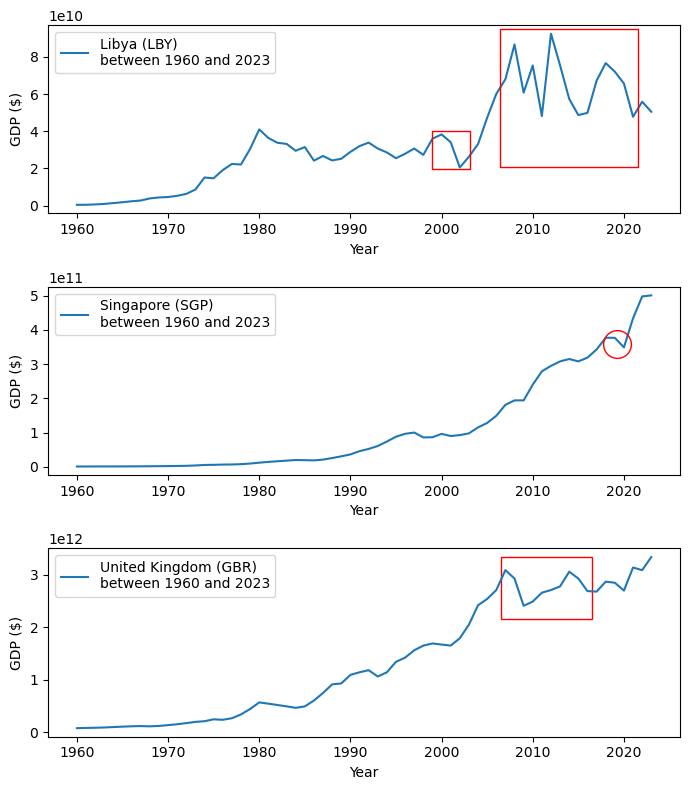

In [13]:
countries = ['Libya', 'Singapore', 'United Kingdom']
gdp_filtered = gdp.clone().filter(gdp['Country Name'].is_in(countries))

n_figs = len(countries)
fig, axes = plt.subplots(n_figs, 1, figsize=(7, 8))

for i in range(n_figs):
    country_name = countries[i]
    country_data = gdp_filtered.filter(gdp_filtered['Country Name'] == country_name)
    country_code = country_data['Country Code'].unique().to_list()[0]
    min_year = min(country_data['Year'].unique().to_list())
    max_year = max(country_data['Year'].unique().to_list())
    sns.lineplot(data=country_data, x='Year', y='GDP', ax=axes[i], label=f"{country_name} ({country_code}) \nbetween {min_year} and {max_year}")
    axes[i].set(ylabel='GDP ($)')
    
    
# Square identifier
axes[0].plot([2014],[5.8e10],'s', ms=100, mec='r', mfc='none')
axes[0].plot([2001],[3e10],'s', ms=28, mec='r', mfc='none')

# Circle identifier
axes[1].plot([2019.25], [3.6e11], 'o', ms=20, mec='r', mfc='none')

# Rectangle identifier
from matplotlib.patches import Rectangle

x_center, y_center = 2011.5, 2.75e12
width, height = 10, 1.2e12

axes[2].add_patch(
    Rectangle(
        (x_center - (width / 2), y_center - (height / 2)), # Bottom-left corner
        width,  # Width
        height, # Height
        linewidth=1,
        edgecolor='r',
        facecolor='none'
    )
)

plt.tight_layout()

## 📊 Visualise: Create a plot to visualise the change in GDP in your country over the past decade.

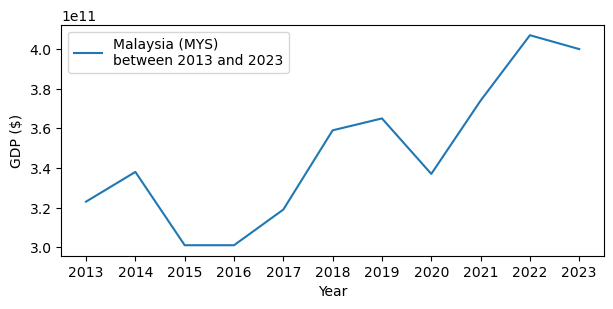

In [14]:
# Create a subset dataframe for Malaysia between 2013 and 2023 (past decade)
malaysia = gdp.filter((gdp['Country Name'] == 'Malaysia') & (gdp['Year'].is_between(2013, 2023)))
malaysia_code = malaysia['Country Code'].unique()
min_year = min(malaysia['Year'].unique().to_list())
max_year = max(malaysia['Year'].unique().to_list())

fig, ax = plt.subplots(figsize=(7, 3))
sns.lineplot(data=malaysia, x='Year', y='GDP', ax=ax, label=f'Malaysia ({malaysia_code.to_list()[0]}) \nbetween {min_year} and {max_year}')
ax.set(xticks=np.arange(2013, 2024, 1), ylabel='GDP ($)')
plt.show()

Malaysia has seen some fluctuation in its GDP over the decade. There are two clear recessions, the first starting in 2014 and the second starting in 2019. Malaysia's GDP hit its peak in early 2022 at around $400 billion and its lowest was between 2015 and 2016 at around $3 billion.

## 🔎 Analyse: Which country had the highest percentage growth in GDP over the past decade?

In [11]:
gdp_decade = gdp.clone().filter(gdp['Year'].is_between(2013, 2023))

country_names = gdp_decade['Country Name'].unique().to_list()

percent_growth_dict = {}

for country in country_names:
    country_data = gdp_decade.filter(gdp_decade['Country Name'] == country)
    
    latest_year_value = country_data.filter(country_data['Year'] == max(country_data['Year']))['GDP']
    earliest_year_value = country_data.filter(country_data['Year'] == min(country_data['Year']))['GDP']
    value_difference = latest_year_value - earliest_year_value
    
    percentage_growth = ((value_difference / earliest_year_value) * 100).round_sig_figs(3)

    percent_growth_dict[country] = percentage_growth.to_list()[0]


percent_growth_df = pl.DataFrame(
    {
        "Country" : list(percent_growth_dict.keys()), 
        "Percentage growth": list(percent_growth_dict.values())
    }
).sort("Percentage growth", descending=True)

percent_growth_df

Country,Percentage growth
str,f64
"""Guyana""",303.0
"""Ethiopia""",245.0
"""Bangladesh""",191.0
"""Guinea""",182.0
"""Sudan""",153.0
…,…
"""Angola""",-35.8
"""Equatorial Guinea""",-44.7
"""Yemen, Rep.""",-46.5


Guyana had the highest percentage growth (303%) in GDP over the past decade (2013-2023).